In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
import acquire
import prepare
import wrangle
from wordcloud import WordCloud
import nltk.sentiment
# pd.set_option('display.max_colwidth', None)
from time import strftime
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import os
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# extensions=acquire.get_extensions()

In [3]:
# len(extensions)

In [4]:
# extensions

In [5]:
# original=acquire.make_json(cached=False)
original = pd.read_json('repo_readmes_pj.json')
df=original.copy()
df.head()

repo    language  \
0         using-system/LightningPay          C#   
1   drminnaar/react-bitcoin-monitor  JavaScript   
2                    lbryio/lbrycrd         C++   
3  ElementsProject/lightning-charge  JavaScript   
4          kilimchoi/cryptocurrency        None   

                                     readme_contents  
0  # LightningPay\nBitcoin Lightning Network Paym...  
1  # React Bitcoin Monitor\n\nAn app that monitor...  
2  # LBRYcrd - The LBRY blockchain\n\n[![Build St...  
3  # Lightning Charge\n\n[![build status](https:/...  
4  Check out https://coinbuddy.co/coins to track ...

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(160, 3)

In [8]:
df.language.value_counts()

JavaScript          36
Python              32
C++                 15
PHP                 14
C                    8
Go                   6
HTML                 6
Java                 5
Ruby                 4
TypeScript           3
C#                   3
Shell                3
Jupyter Notebook     3
CoffeeScript         1
R                    1
Dart                 1
VHDL                 1
Rust                 1
Vue                  1
Prolog               1
CSS                  1
Perl                 1
SCSS                 1
Name: language, dtype: int64

In [9]:
df = prepare.prep_readme_data(df, 'readme_contents', extra_words=[], exclude_words=[])
df.sample(10)

repo      language  \
98            AltCoinExchange/ethatomicswap    JavaScript   
23   technologiespro/paper-wallet-generator           Vue   
82            Bitcoin-sCrypt/Bitcoin-sCrypt           C++   
60                     lightningnetwork/lnd            Go   
153                   phelix/easywinbuilder         Shell   
121                  lyndsysimon/bip32utils        Python   
124                  trezor/trezor-hardware          None   
147                     goncalopp/mexbtcapi        Python   
11                   doomhz/coinnext_engine  CoffeeScript   
30                            indyjo/bitwrk            Go   

                                       readme_contents  \
98   # Ethereum Atomic Swap\n\nCreated by: www.altc...   
23   # Paper Wallet Generator Desktop & Mobile\n\n[...   
82                                           README.md   
60   ## Lightning Network Daemon\n\n[![Build Status...   
153  EasyWinBuilder v0.7 for Bitcoin Core\n========...   
121  Introduction\n============\n\nThe bip32utils l...   
124  # Hardware design of Trezor\n\n[![gitter](http...   
147  [![Build Status](https://travis-ci.org/goncalo...   
11   coinnext engine\n===============\n\nVirtual co...   
30   BitWrk - Bitcoin-fueled Distributed Peer-to-Pe...   

                                                 clean  \
98   ethereum atomic swap created wwwaltcoinexchang...   
23   paper wallet generator desktop mobile paperwal...   
82                                            readmemd   
60   lightning network daemon build statushttpsimgs...   
153  easywinbuilder v07 bitcoin core c 20142015 phe...   
121  introduction bip32utils library pure python im...   
124  hardware design trezor gitterhttpsbadgesgitter...   
147  build statushttpstravisciorggoncaloppmexbtcapi...   
11   coinnext engine virtual coins market exchange ...   
30   bitwrk bitcoinfueled distributed peertopeer bl...   

                                               stemmed  \
98   ethereum atom swap creat wwwaltcoinexchangecom...   
23   paper wallet gener desktop mobil paperwalletge...   
82                                            readmemd   
60   lightn network daemon build statushttpsimgshie...   
153  easywinbuild v07 bitcoin core c 20142015 pheli...   
121  introduct bip32util librari pure python implem...   
124  hardwar design trezor gitterhttpsbadgesgitteri...   
147  build statushttpstravisciorggoncaloppmexbtcapi...   
11   coinnext engin virtual coin market exchang eng...   
30   bitwrk bitcoinfuel distribut peertop blender r...   

                                            lemmatized  
98   ethereum atomic swap created wwwaltcoinexchang...  
23   paper wallet generator desktop mobile paperwal...  
82                                            readmemd  
60   lightning network daemon build statushttpsimgs...  
153  easywinbuilder v07 bitcoin core c 20142015 phe...  
121  introduction bip32utils library pure python im...  
124  hardware design trezor gitterhttpsbadgesgitter...  
147  build statushttpstravisciorggoncaloppmexbtcapi...  
11   coinnext engine virtual coin market exchange e...  
30   bitwrk bitcoinfueled distributed peertopeer bl...

In [10]:
df.shape

(160, 6)

In [11]:
df.columns

Index(['repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [12]:
df=df.drop(columns=['readme_contents', 'clean', 'stemmed'])
df.head()

repo    language  \
0         using-system/LightningPay          C#   
1   drminnaar/react-bitcoin-monitor  JavaScript   
2                    lbryio/lbrycrd         C++   
3  ElementsProject/lightning-charge  JavaScript   
4          kilimchoi/cryptocurrency        None   

                                          lemmatized  
0  lightningpay bitcoin lightning network payment...  
1  react bitcoin monitor app monitor change _bitc...  
2  lbrycrd lbry blockchain build statushttpstravi...  
3  lightning charge build statushttpsapitraviscio...  
4  check httpscoinbuddycocoins track exchange sup...

In [13]:
df.dtypes

repo          object
language      object
lemmatized    object
dtype: object

In [14]:
df.isnull().sum()

repo           0
language      12
lemmatized     0
dtype: int64

In [15]:
df[df.language.isnull()]
# null_data = df[df.isnull().any(axis=1)]


repo language  \
4                     kilimchoi/cryptocurrency     None   
12                   happyg1t/bitcoin-analysis     None   
18              dily3825002/awesome-blockchain     None   
29   bitcoinfullnode/rokos-ok-bitcoin-fullnode     None   
58    roslinpl/bitcoin.it-promotional_graphics     None   
66                richardgill/BitcoinEmissions     None   
97     hylinux1024/awesome-blockchain-articles     None   
124                     trezor/trezor-hardware     None   
125      ashchan/bitcoin-ethereum-cryptography     None   
130              openblockchains/bitcoin-ponzi     None   
133                bitcoin-intro/bitcoin-intro     None   
151      FreekPaans/bitcoin-multi-node-regtest     None   

                                            lemmatized  
4    check httpscoinbuddycocoins track exchange sup...  
12                                     bitcoinanalysis  
18   p aligncenter img srclogojpeg height130 p p al...  
29   rokosokhttpsiimgurcomyyxj9uppng rokos iot ok b...  
58   bitcoinitpromotional_graphics fixed bitcoin pr...  
66   bitcoinemissions project calculate co2 emissio...  
97   awesome blockchain article collection awesome ...  
124  hardware design trezor gitterhttpsbadgesgitter...  
125  2017521httpecafetokyo slide markdown deckset p...  
130  yes bitcoin ponzi learn investment fraud work ...  
133  version 007 en href englisha hrefesespanola hr...  
151  multinode multiwallet bitcoin regtest network ...

In [16]:
df.language.fillna(value='Unknown',inplace=True)



In [17]:
df[df.language.isnull()]



Empty DataFrame
Columns: [repo, language, lemmatized]
Index: []

In [18]:
df.shape

(160, 3)

In [19]:
df.isna().sum()

repo          0
language      0
lemmatized    0
dtype: int64

In [20]:
drop_list = ['CoffeeScript',
'R',
'CSS',
'Prolog',
'Vue',
'Dart',
'Rust',
'SCSS',
'Perl',
'VHDL'
]

In [21]:
# DROPPING LANGUAGES THAT HAVE FEWER THAN ONE INSTANCE
# BC IT CREATES PROBLEMS FOR SPLITTING THE DATA
df = df[~df.language.isin(drop_list)]

In [22]:
df.head()


repo    language  \
0         using-system/LightningPay          C#   
1   drminnaar/react-bitcoin-monitor  JavaScript   
2                    lbryio/lbrycrd         C++   
3  ElementsProject/lightning-charge  JavaScript   
4          kilimchoi/cryptocurrency     Unknown   

                                          lemmatized  
0  lightningpay bitcoin lightning network payment...  
1  react bitcoin monitor app monitor change _bitc...  
2  lbrycrd lbry blockchain build statushttpstravi...  
3  lightning charge build statushttpsapitraviscio...  
4  check httpscoinbuddycocoins track exchange sup...

In [23]:
# SPLIT
from sklearn.model_selection import train_test_split
# Test set is .2 of original dataframe
train, test = train_test_split(df, test_size = .2, random_state=123, stratify= df.language)
# The remainder is here divided .7 to train and .3 to validate
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify= train.language)
train.shape, validate.shape, test.shape
# ------------------------

# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.lemmatized)
# y = pd.DataFrame(df.language)

((84, 3), (36, 3), (30, 3))

In [24]:
X_train = train.drop(columns=['language'])
y_train = pd.DataFrame(train.language, columns=['language'])

X_validate = validate.drop(columns=['language'])
y_validate = pd.DataFrame(validate.language, columns=['language'])

X_test = test.drop(columns=['language'])
y_test = pd.DataFrame(test.language, columns=['language'])

train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, 
X_validate.shape, y_validate.shape, X_test.shape, y_test.shape


((36, 2), (36, 1), (30, 2), (30, 1))

In [25]:
# train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
# wrangle.split_repos(df)

In [26]:
df.language.value_counts(normalize = True)

JavaScript          0.240000
Python              0.213333
C++                 0.100000
PHP                 0.093333
Unknown             0.080000
C                   0.053333
HTML                0.040000
Go                  0.040000
Java                0.033333
Ruby                0.026667
Jupyter Notebook    0.020000
Shell               0.020000
TypeScript          0.020000
C#                  0.020000
Name: language, dtype: float64

## Do we need to subject the word lists to another basic clean (it was applied in the prep function above)


In [27]:
# combine all contents in single string by language

from prepare import *

JavaScript_words = basic_clean(' '.join(df[df.language == 'Java'].lemmatized))
Python_words = basic_clean(' '.join(df[df.language == 'Python'].lemmatized))
C_plus_plus_words = basic_clean(' '.join(df[df.language == 'C++'].lemmatized))
# wiki_words = basic_clean(' '.join(train[train.language == 'Wikitext'].lemmatized))
PHP_words = basic_clean(' '.join(df[df.language == 'PHP'].lemmatized))
Unknown_words = basic_clean(' '.join(df[df.language == 'Unknown'].lemmatized))
# type_words = basic_clean(' '.join(df[df.language == 'TypeScript'].lemmatized))
C_words = basic_clean(' '.join(df[df.language == 'C'].lemmatized))
Go_words = basic_clean(' '.join(df[df.language == 'Java'].lemmatized))
HTML_words = basic_clean(' '.join(df[df.language == 'HTML'].lemmatized))
Java_words = basic_clean(' '.join(df[df.language == 'Java'].lemmatized))
Ruby_words = basic_clean(' '.join(df[df.language == 'Ruby'].lemmatized))
C_sharp_words = basic_clean(' '.join(df[df.language == 'C#'].lemmatized))
TypeScript_words = basic_clean(' '.join(df[df.language == 'TypeScript'].lemmatized))
Shell_words = basic_clean(' '.join(df[df.language == 'Shell'].lemmatized))
Jupyter_Notebook_words = basic_clean(' '.join(df[df.language == 'Jupyter Notebook'].lemmatized))
# ascii_words = basic_clean(' '.join(df[df.language == 'AsciiDoc'].lemmatized))
all_words = basic_clean(' '.join(df.lemmatized))

In [28]:
Java = pd.DataFrame(pd.Series(Java_words.split()))
C_plus_plus = pd.DataFrame(pd.Series(C_plus_plus_words.split()))

In [29]:
# temp = pd.DataFrame({})
# temp
# temp['java']=java
# temp['c_plus_plus']=c_plus_plus

In [30]:
Java.shape, C_plus_plus.shape

((813, 1), (6198, 1))

In [31]:
languages_words_list = [
JavaScript_words,
Python_words,
C_plus_plus_words,
PHP_words,
Unknown_words,
C_words,
Go_words,
HTML_words,
Java_words,
Ruby_words,
C_sharp_words,
TypeScript_words,
Shell_words,
Jupyter_Notebook_words
]


In [32]:
# represent contents as word frequencies
JavaScript_freq = pd.Series(JavaScript_words.split()).value_counts()
python_freq = pd.Series(Python_words.split()).value_counts()
C_plus_plus_freq = pd.Series(C_plus_plus_words.split()).value_counts()
PHP_freq = pd.Series(PHP_words.split()).value_counts()
Unknown_freq = pd.Series(Unknown_words.split()).value_counts()
C_freq = pd.Series(C_words.split()).value_counts()
Go_freq = pd.Series(Go_words.split()).value_counts()
HTML_freq = pd.Series(HTML_words.split()).value_counts()
Java_freq = pd.Series(Java_words.split()).value_counts()
Ruby_freq = pd.Series(Ruby_words.split()).value_counts()
C_sharp_freq = pd.Series(C_sharp_words.split()).value_counts()
TypeScript_freq = pd.Series(TypeScript_words.split()).value_counts()
Shell_freq = pd.Series(Shell_words.split()).value_counts()
Jupyter_Notebook_freq = pd.Series(Jupyter_Notebook_words.split()).value_counts()

all_freq = pd.Series(all_words.split()).value_counts()


JavaScript_freq,
python_freq,
C_plus_plus_freq,
PHP_freq,
Unknown_freq,
C_freq,
Go_freq,
HTML_freq,
Java_freq,
Ruby_freq,
C_sharp_freq,
TypeScript_freq,
Shell_freq,
Jupyter_Notebook_freq,
all_freq'

'JavaScript_freq',
'python_freq',
'C_plus_plus_freq',
'PHP_freq',
'Unknown_freq',
'C_freq',
'Go_freq',
'HTML_freq',
'Java_freq',
'Ruby_freq',
'C_sharp_freq',
'TypeScript_freq',
'Shell_freq',
'Jupyter_Notebook_freq',
'all_freq'




In [43]:

word_counts = pd.concat([
JavaScript_freq,
python_freq,
C_plus_plus_freq,
PHP_freq,
Unknown_freq,
C_freq,
Go_freq,
HTML_freq,
Java_freq,
Ruby_freq,
C_sharp_freq,
TypeScript_freq,
Shell_freq,
Jupyter_Notebook_freq,
all_freq
], axis=1).fillna(0).astype(int)
word_counts.columns = ['JavaScript',
'python',
'C_plus_plus',
'PHP',
'Unknown',
'C',
'Go',
'HTML',
'Java',
'Ruby',
'C_sharp',
'TypeScript',
'Shell',
'Jupyter_Notebook',
'all']
word_counts.head()

JavaScript  python  C_plus_plus  PHP  Unknown   C  Go  HTML  Java  \
wallet           27      34           18   24       25  13  27     1    27   
bitcoin          18     107           45   42      172  22  18    11    18   
support          17      18           13   13        7   9  17     0    17   
key              16      97          136   19        2  14  16     3    16   
file             14      32           42   20        1  18  14     2    14   

         Ruby  C_sharp  TypeScript  Shell  Jupyter_Notebook  all  
wallet      2        2          14      2                 0  226  
bitcoin    60       11           3      7                31  744  
support     2        0           7      2                 1  117  
key        16       24           0      0                 6  448  
file        0        0          17     17                 5  204

In [44]:
Java_words_series = pd.Series(Java_words.split())
Java_words_series.value_counts()

wallet                                                       27
bitcoin                                                      18
support                                                      17
key                                                          16
file                                                         14
                                                             ..
mind                                                          1
250                                                           1
block                                                         1
removed                                                       1
httpsgithubcomameijerbitcoin_wallet_recovery_toolreleases     1
Length: 423, dtype: int64

### Wordcloud is a pip install--for reproducibility

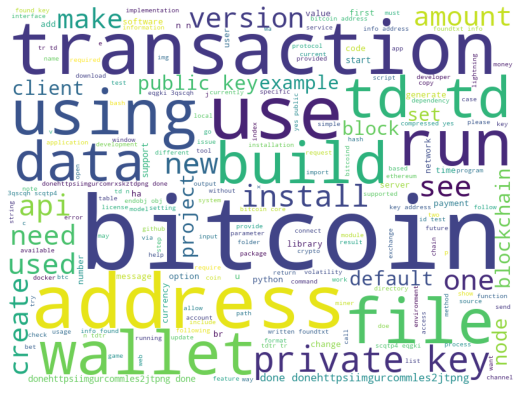

In [45]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off');

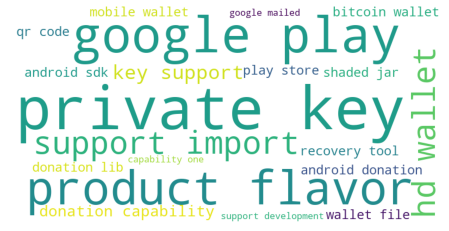

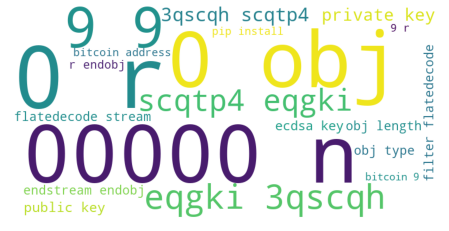

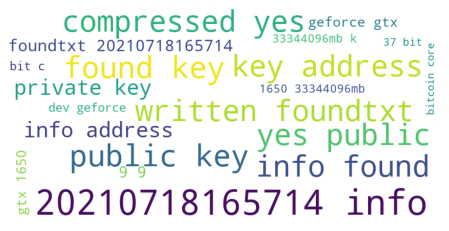

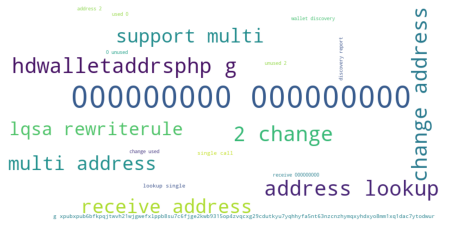

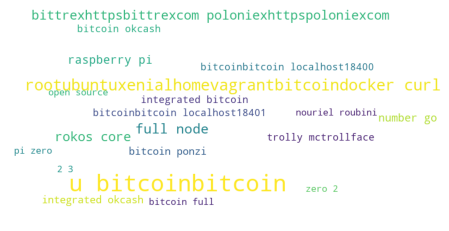

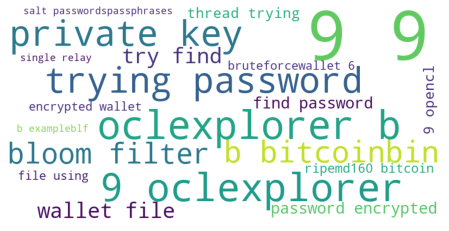

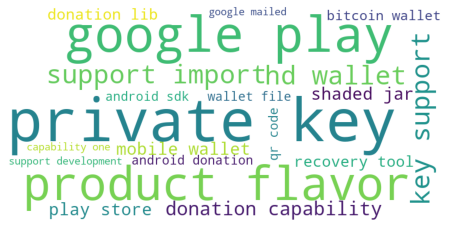

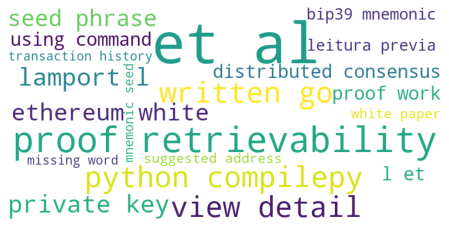

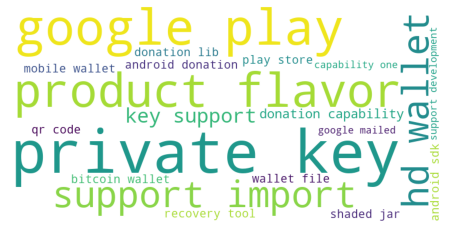

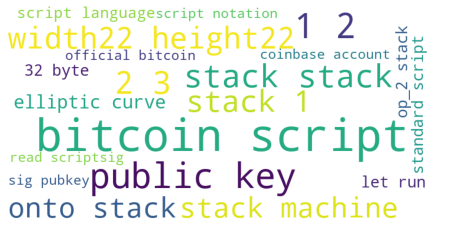

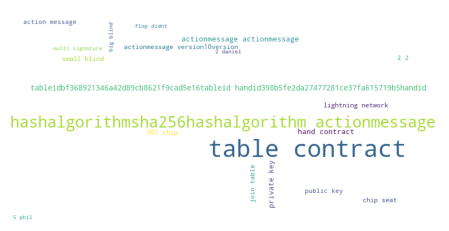

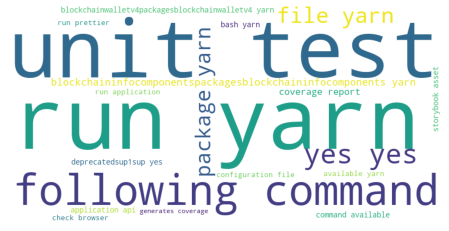

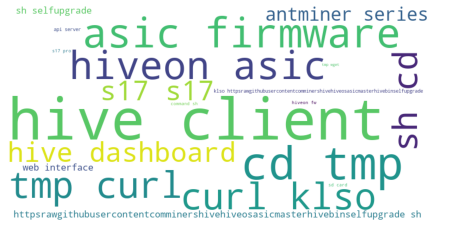

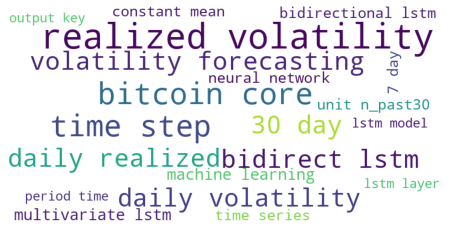

In [46]:
for language in languages_words_list:
    bigrams = pd.Series(nltk.bigrams(language.split())).value_counts().head(20)


    data = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [47]:
# # value_counts bc we want the most commonly occuring bigrams at the forefront
# java_bigrams = pd.Series(nltk.bigrams(java_words.split())).value_counts().head(20)


# data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
# img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
# plt.figure(figsize=(8, 4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [48]:
# # value_counts bc we want the most commonly occuring bigrams at the forefront
# java_trigrams = pd.Series(nltk.trigrams(java_words.split())).value_counts().head(20)


# data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in java_trigrams.to_dict().items()}
# img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
# plt.figure(figsize=(8, 4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

- I'm not a huge fan of the trigrams viz, maybe the bigrams loop.  
- Also, there are no words in the wiki words set

<Figure size 1440x648 with 0 Axes>

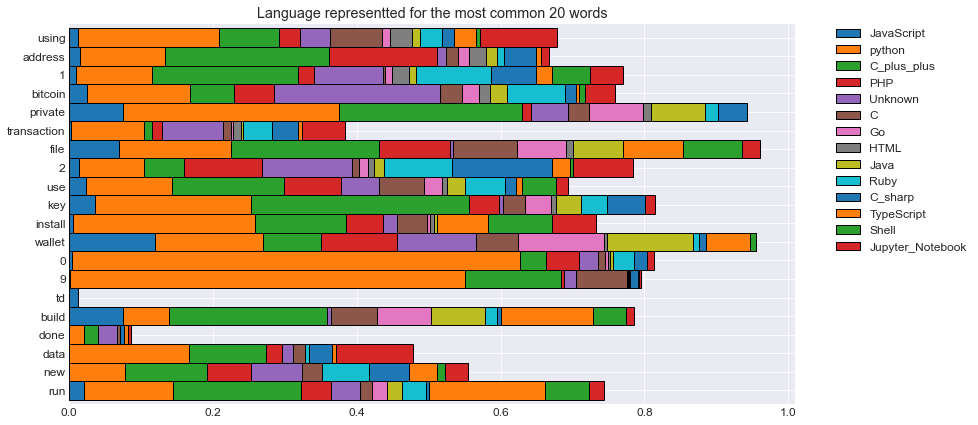

In [50]:
plt.figure(figsize=(20, 9))
plt.rc('font', size=12)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'HTML')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('Language representted for the most common 20 words')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [51]:
df.language.value_counts()

JavaScript          36
Python              32
C++                 15
PHP                 14
Unknown             12
C                    8
HTML                 6
Go                   6
Java                 5
Ruby                 4
Jupyter Notebook     3
Shell                3
TypeScript           3
C#                   3
Name: language, dtype: int64

In [52]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

<Figure size 1440x720 with 0 Axes>

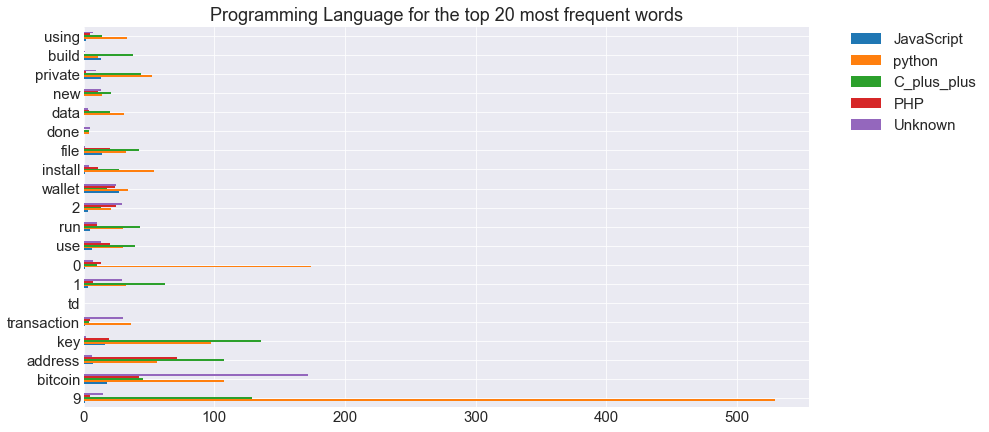

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rc('font', size=15)
word_counts.sort_values('all', ascending=False).head(20)[['JavaScript',
'python',
'C_plus_plus',
'PHP',
'Unknown'
]].plot.barh()
plt.title('Programming Language for the top 20 most frequent words')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

- At the least, we can see that different languages are more present for different words

In [54]:
freq_list=[
JavaScript_freq,
python_freq,
C_plus_plus_freq,
PHP_freq,
Unknown_freq,
C_freq,
Go_freq,
HTML_freq,
Java_freq,
Ruby_freq,
C_sharp_freq,
TypeScript_freq,
Shell_freq,
Jupyter_Notebook_freq
]

In [63]:
# this code is not exactly what i'm shooting for but for time i'm moving on now
for freq in freq_list:
    print(f"{freq}'s most commonly appearing word is {freq.idxmax()}")
    print('----------------------------------------------------')


wallet                                                       27
bitcoin                                                      18
support                                                      17
key                                                          16
file                                                         14
                                                             ..
mind                                                          1
250                                                           1
block                                                         1
removed                                                       1
httpsgithubcomameijerbitcoin_wallet_recovery_toolreleases     1
Length: 423, dtype: int64's most commonly appearing word is wallet
----------------------------------------------------
9                 529
0                 174
bitcoin           107
r                 106
key                97
                 ... 
452                 1
6owuajzvv           1


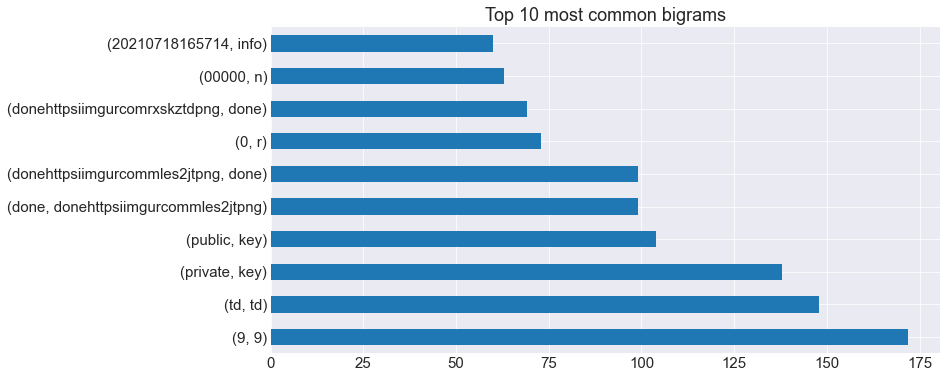

In [64]:
# most common bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams');

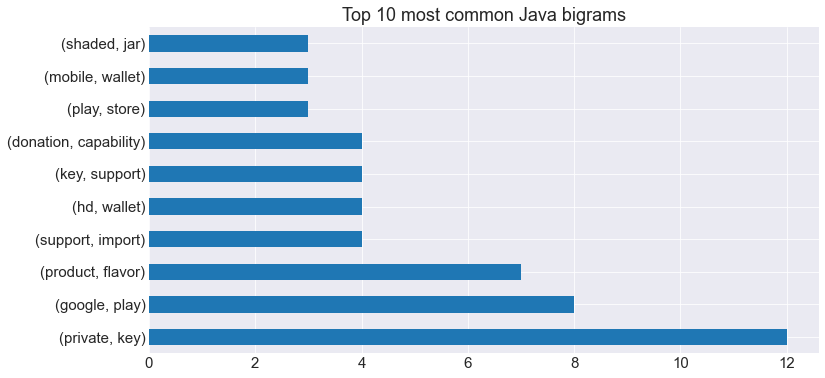

In [65]:
# most common Java bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(JavaScript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Java bigrams');

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [79]:
X_train

repo  \
142         kendricktan/misocoin   
107    ZenGo-X/mnemonic-recovery   
7        mappum/bitcoin-protocol   
164        svtrostov/oclexplorer   
121       lyndsysimon/bip32utils   
..                           ...   
42        nopara73/HiddenBitcoin   
60          lightningnetwork/lnd   
91   chrisfranko/bitcoin-webskin   
139     stacks-network/pybitcoin   
5          tip4commit/tip4commit   

                                            lemmatized  
142  h1p aligncentermisocoinph1 p aligncenter img w...  
107  seed savior tool recovering bip39 seed phrase ...  
7    bitcoinprotocol npm versionhttpsimgshieldsionp...  
164  bitcoin address bruteforce tool via gpu opencl...  
121  introduction bip32utils library pure python im...  
..                                                 ...  
42   hiddenbitcoin privacy orineted bitcoin wallet ...  
60   lightning network daemon build statushttpsimgs...  
91   bitcoin webskin open source php web interface ...  
139  pybitcoin code deprecated used python library ...  
5    tip4commit tip next commithttpstip4commitcompr...  

[84 rows x 2 columns]

In [94]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized)
y = df.language

X_train, X_validate, y_train, y_validate = train_test_split(X, y, stratify=y, \
                                                            test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,stratify=y_train, test_size=.2)



- a little confusing the way the lesson named the variables

In [95]:
from sklearn.linear_model import LogisticRegression

In [104]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['lr_predicted'] = lm.predict(X_train)
validate['lr_predicted'] = lm.predict(X_validate)

In [105]:
# tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
# train['tree_predicted'] = tree.predict(X_train)
# validate['tree_predicted'] = tree.predict(X_validate)

In [106]:
train.head()

actual lr_predicted
103  TypeScript   JavaScript
135      Python       Python
134  JavaScript   JavaScript
56         HTML       Python
42           C#   JavaScript

In [107]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.lr_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.lr_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.lr_predicted))

Accuracy: 65.62%
---
Confusion Matrix
actual        C  C#  C++  Go  HTML  Java  JavaScript  Jupyter Notebook  PHP  \
lr_predicted                                                                  
C++           0   0    9   0     0     0           0                 0    0   
JavaScript    5   2    0   4     3     2          23                 1    2   
PHP           0   0    0   0     0     0           0                 0    7   
Python        0   0    0   0     1     1           0                 1    0   
Unknown       0   0    0   0     0     0           0                 0    0   

actual        Python  Ruby  Shell  TypeScript  Unknown  
lr_predicted                                            
C++                0     0      0           0        0  
JavaScript         0     2      2           2        5  
PHP                0     0      0           0        0  
Python            21     0      0           0        0  
Unknown            0     0      0           0        3  
---
     

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [108]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.lr_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.lr_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.lr_predicted))


Accuracy: 36.67%
---
Confusion Matrix
actual        C  C#  C++  Go  HTML  Java  JavaScript  Jupyter Notebook  PHP  \
lr_predicted                                                                  
JavaScript    0   1    3   1     1     1           7                 1    3   
Python        1   0    0   0     0     0           0                 0    0   

actual        Python  Ruby  Shell  TypeScript  Unknown  
lr_predicted                                            
JavaScript         2     1      1           1        2  
Python             4     0      0           0        0  
---
                  precision    recall  f1-score   support

               C       0.00      0.00      0.00         1
              C#       0.00      0.00      0.00         1
             C++       0.00      0.00      0.00         3
              Go       0.00      0.00      0.00         1
            HTML       0.00      0.00      0.00         1
            Java       0.00      0.00      0.00         1
      

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Everything here and below is my attempt to draw a network graph with networkx

#### Networkx has to be installed using pip or conda

In [69]:
import networkx as nx
import plotly.graph_objects as go

In [70]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
nx.shortest_path(G, 'A', 'D', weight='weight')
['A', 'B', 'D']

['A', 'B', 'D']

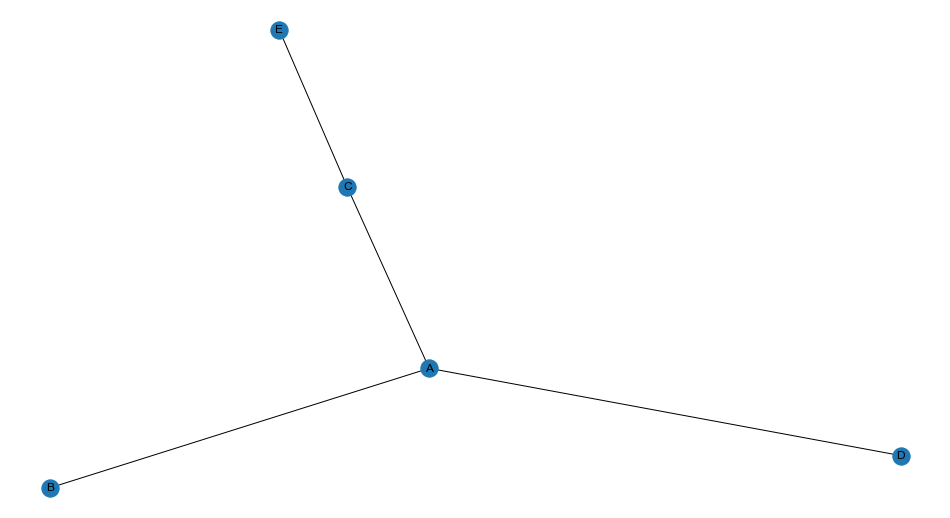

In [71]:
# Build a dataframe with 4 connections
sample = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# Build your graph
G=nx.from_pandas_edgelist(sample, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [72]:
G = nx.random_geometric_graph(200, 0.125,seed=None)

In [73]:
# G.edges
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199))

In [74]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [75]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [76]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [77]:
G=nx.Graph()

In [ ]:
# java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
# c_plus_plus__words = basic_clean(' '.join(df[df.language == 'C++'].readme_contents))
# wiki_words = basic_clean(' '.join(train[train.language == 'Wikitext'].readme_contents))
# type_words = basic_clean(' '.join(df[df.language == 'TypeScript'].readme_contents))
# c_words = basic_clean(' '.join(df[df.language == 'C'].readme_contents))
# ascii_words = basic_clean(' '.join(df[df.language == 'AsciiDoc'].readme_contents))
# python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
# html_words = basic_clean(' '.join(df[df.language == 'HTML'].readme_contents))

In [ ]:
G.add_edge(java_words)
G.add_edge(c_plus_plus__words)
G.add_edge(wiki_words)
G.add_edge(type_words)
G.add_edge(c_words)
G.add_edge(ascii_words)
G.add_edge(python_words)
G.add_edge(html_words)

In [ ]:
G.nodes

In [ ]:
G.add_edges_from(all_words)